#120 Years of Olympic Data: Olympics EDA Final
By Scott Kubick
kubick408060@Newmanu.edu

#Summary of the Data



**120 years of Olympics data, from 1896-2018**

**Data Source**

120 years of Olympic history: athletes and results https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results

**Description**

From the Kaggle page: “This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. I scraped this data from www.sports-reference.com in May 2018. The R code I used to scrape and wrangle the data is on GitHub. I recommend checking my kernel before starting your own analysis.”

“Note that the Winter and Summer Games were held in the same year up until 1992. After that, they staggered them such that Winter Games occur on a four-year cycle starting with 1994, then Summer in 1996, then Winter in 1998, and so on. A common mistake people make when analyzing this data is to assume that the Summer and Winter Games have always been staggered.”

**Files**

Two CSV files: athlete_events.csv: 271,116 rows, 15 columns noc_regions.csv: 230 rows, 3 columns

*   List item
*   List item



**#Data Dictionary**

Fields in athlete_events.csv

271,116 records, each representing an event in which the athlete competed. (If an athlete competed in 15 events, the athlete will have 15 entries.)



*   ID: Unique number for each athlete
*   Name: Athlete’s full name
*   Sex: M or F
*   Age: Age when competed in this specific Olympic event
*   Height: Height in centimeters
*   Weight: Weight in kilograms
*   Team: The specific team on which the athlete competed. (This is not identical to country or National Olympic Committee Region. An NOC region may have multiple teams.)
*   NOC: National Olymic Committee 3-letter code
*   Games: Year and season of the Olympic games for this event
*   Year: Year as a four-digit integer
*   Season: Summer or Winter
*   City: Host city
*   Sport: A parent category of the Event
*   Event: Specific event in which the athlete competed.
*   Medal: Gold, Silver, Bronce, or null (for no medal)

Fields in noc_regions.csv
230 Records, each representing an National Olympic Committee and its region (aka country)
*   NOC:National Olympic Committee three-letter code
*   region: Country name
*   notes: usually null, but a small number of records have a note about details that might be unclear regarding the NOC and region

# Import Libraries and Set Notebook Defaults

In [ ]:
 #Import Python Tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In the above section, I brought in the libraries that I will need for this notebook

#Read and Review - athlete_events

In [ ]:
#Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Bring in data from file, "athlete_events.csv"
df = pd.read_csv('/content/drive/MyDrive/Olympics_EDA/athlete_events.csv')

In [ ]:
#Review the top 5 rows of athlete events
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
#Review the bottom 5 rows of athlete events
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [ ]:
#Review the dataset types of athlete events
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In the Olympics EDA:Read and Review .  I wanted to automate the connecting to my drive.  Then I wanted to bring in the file athlete_events.csv file.

# Read & Review noc_regions File

In [ ]:
#Bring in file noc_regions.csv
df1 = pd.read_csv('/content/drive/MyDrive/Olympics_EDA/noc_regions.csv')

In [ ]:
#Reveiw top 5 rows of noc_regions.csv
df1.head()

,NOC,Region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [ ]:
#Reveiw dataset types of noc_regions.csv
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   Region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In this section I wanted to bring in the noc_regions file and determine how to merge the two files.

# Merge noc_regions.csv & athlete_events.csv


In [ ]:
#Merger file athletic_events.csv and noc_regions.csb on the NOC column
df = df1.merge(df, how = 'left', on = 'NOC')

In this section, I mearged the athlete_events.csv file with the noc_regions file on the NOC column.

#Cleaning Steps


##Setting Data Types

In [ ]:
#Remove the .0 after the ID by converting to an interger
df = df[np.isfinite(df['ID'])]
df['ID'] = df['ID'].astype(int)

In [ ]:
#Remove the .0 after the Age by converting to an interger
df = df[np.isfinite(df['Age'])]
df['Age'] = df['Age'].astype(int)

In [ ]:
#Remove the .0 after the Height by converting to an interger
df = df[np.isfinite(df['Height'])]
df['Height'] = df['Height'].astype(int)

<ipython-input-479-f02c8ab295b9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Height'] = df['Height'].astype(int)


In [ ]:
#Remove the .0 after the Weight by converting to an interger
df = df[np.isfinite(df['Weight'])]
df['Weight'] = df['Weight'].astype(int)

In [ ]:
#Remove the .0 after the Year by converting to an interger
df['Year'] = df['Year'].astype(int)

In [ ]:
#for all missing values in Age I am using the median
df["Age"] = df["Age"].fillna(df["Age"].median())

In [ ]:
#for all missing values in Height I am using the median
df["Height"] = df["Height"].fillna(df["Height"].median())

In [ ]:
#for all missing values in Weight I am using the median
df["Weight"] = df["Weight"].fillna(df["Weight"].median())

In [ ]:
#after review all the null values in region should be set to Singapour
df['Region'] = df['Region'].fillna('Singapour')

In [ ]:
#change null values to no medal
df['Medal'] = df['Medal'].fillna('No Medal')

In this section I wanted to set all the data types correctly, and to clean the data for data visualization.  

##Drop Duplicates

In [ ]:
#Dropping duplicate rows
df = df.drop_duplicates()

In [ ]:
#Reset the index of the dataframe
df = df.reset_index(drop=True)

In [ ]:
#I want to drop the notes column due to I don't think this column of data is revelant
df = df.drop('notes', axis=1)

In [ ]:
#I want to drop the NOC column due to I don't think this column of data is revelant
df = df.drop('NOC', axis=1)

In subsection, I am droping data I will not need to have a clean dataset.

# Data Statistics and Visualizations

In [ ]:
df.head()


,Region,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal
0,Afghanistan,1745,Mohammad Aktar,M,17,156,48,Afghanistan,1980 Summer,1980,Summer,Moskva,Wrestling,"Wrestling Men's Light-Flyweight, Freestyle",No Medal
1,Afghanistan,6261,Mohammad Aynutdin,M,25,160,52,Afghanistan,1980 Summer,1980,Summer,Moskva,Wrestling,"Wrestling Men's Flyweight, Freestyle",No Medal
2,Afghanistan,6280,Kayum Ayub,M,21,176,78,Afghanistan,1968 Summer,1968,Summer,Mexico City,Wrestling,"Wrestling Men's Welterweight, Freestyle",No Medal
3,Afghanistan,6336,Masoud Azizi,M,19,168,64,Afghanistan,2004 Summer,2004,Summer,Athina,Athletics,Athletics Men's 100 metres,No Medal
4,Afghanistan,6336,Masoud Azizi,M,23,168,64,Afghanistan,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Men's 100 metres,No Medal


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205898 entries, 0 to 205897
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Region  205898 non-null  object
 1   ID      205898 non-null  int64 
 2   Name    205898 non-null  object
 3   Sex     205898 non-null  object
 4   Age     205898 non-null  int64 
 5   Height  205898 non-null  int64 
 6   Weight  205898 non-null  int64 
 7   Team    205898 non-null  object
 8   Games   205898 non-null  object
 9   Year    205898 non-null  int64 
 10  Season  205898 non-null  object
 11  City    205898 non-null  object
 12  Sport   205898 non-null  object
 13  Event   205898 non-null  object
 14  Medal   205898 non-null  object
dtypes: int64(5), object(10)
memory usage: 23.6+ MB


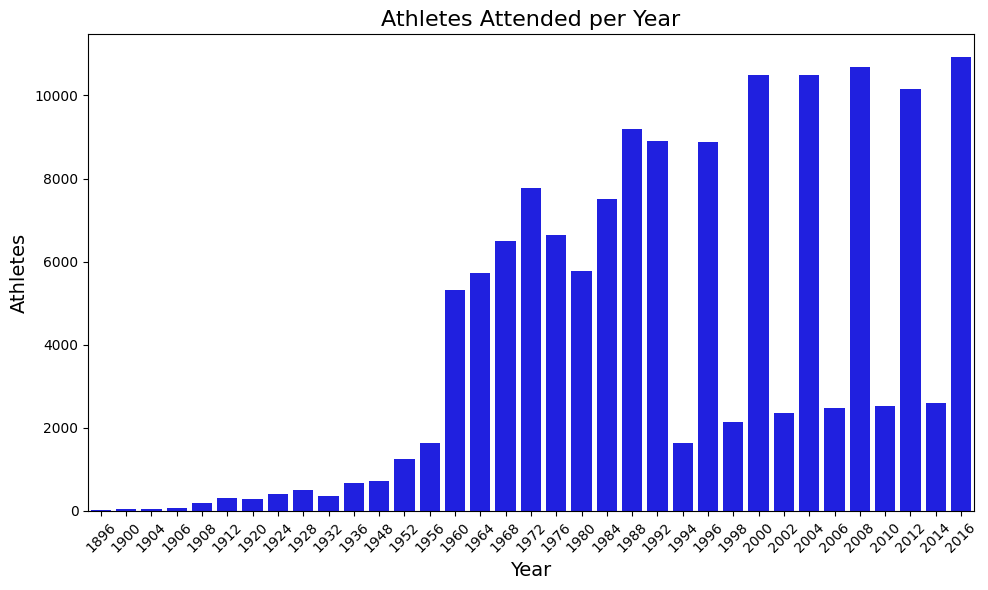

In [ ]:
# Grouping by year to get the count of unique names per year
names_per_year = df.groupby('Year')['Name'].nunique().reset_index()

# Creating the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Name', data=names_per_year, color='blue')

# Customizing the plot
plt.title('Athletes Attended per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Athletes', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Showing the plot

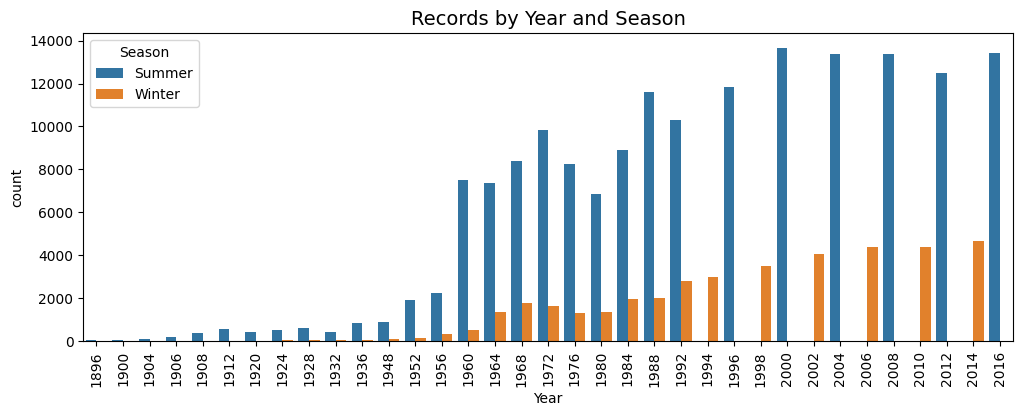

In [ ]:
# Now color-code with separate bars for Season
plt.figure(figsize=(12,4))
plt.title("Records by Year and Season", fontsize=14)
ax = sns.countplot(df, x="Year", hue="Season");
ax.tick_params(axis='x', rotation=90)

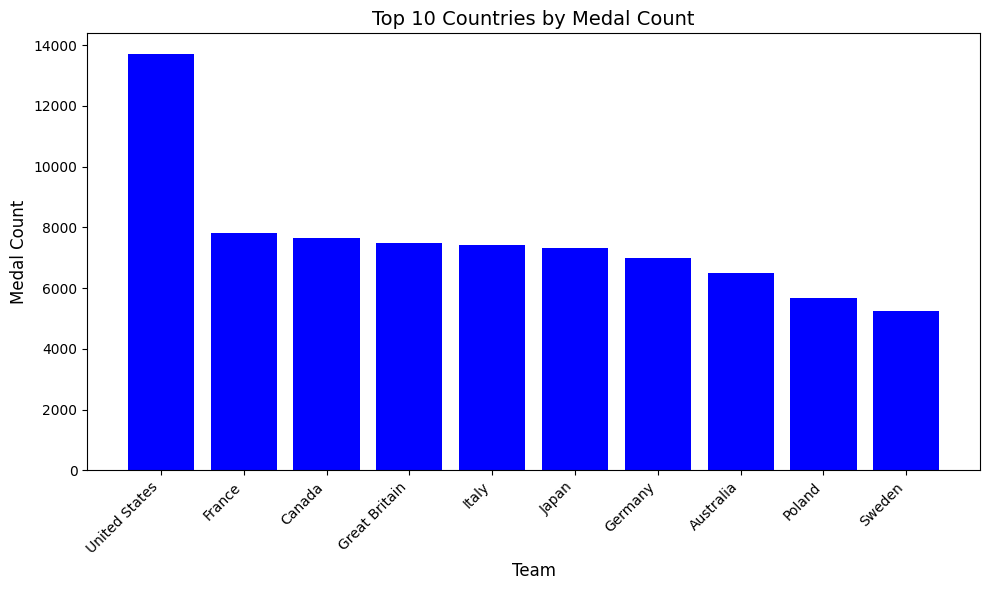

In [ ]:
# Create a bar chart for the top 10 countries by Medal Count
plt.figure(figsize=(10, 6))
plt.bar(top_10_teams['Team'], top_10_teams['Medal Count'], color='blue')

# Add labels and title
plt.xlabel('Team', fontsize=12)
plt.ylabel('Medal Count', fontsize=12)
plt.title('Top 10 Countries by Medal Count', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()


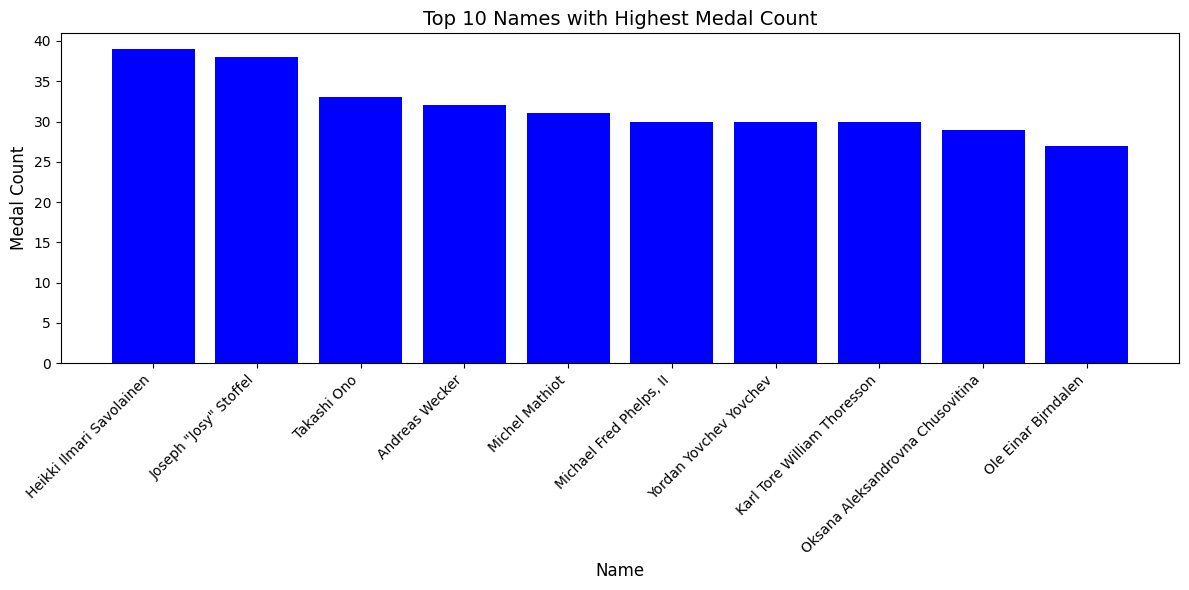

In [ ]:
# Top 10 names with the Highest Medal Count
medal_data = df[df['Medal'].notna()]

# Group by 'Name' and count the number of medals for each individual
name_medal_counts = medal_data.groupby('Name').size().reset_index(name='Medal Count')

# Sort by medal count in descending order
sorted_names = name_medal_counts.sort_values(by='Medal Count', ascending=False).head(10)  # Select top 10 names

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(sorted_names['Name'], sorted_names['Medal Count'], color='blue')

# Add labels and title
plt.xlabel('Name', fontsize=12)
plt.ylabel('Medal Count', fontsize=12)
plt.title('Top 10 Names with Highest Medal Count', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

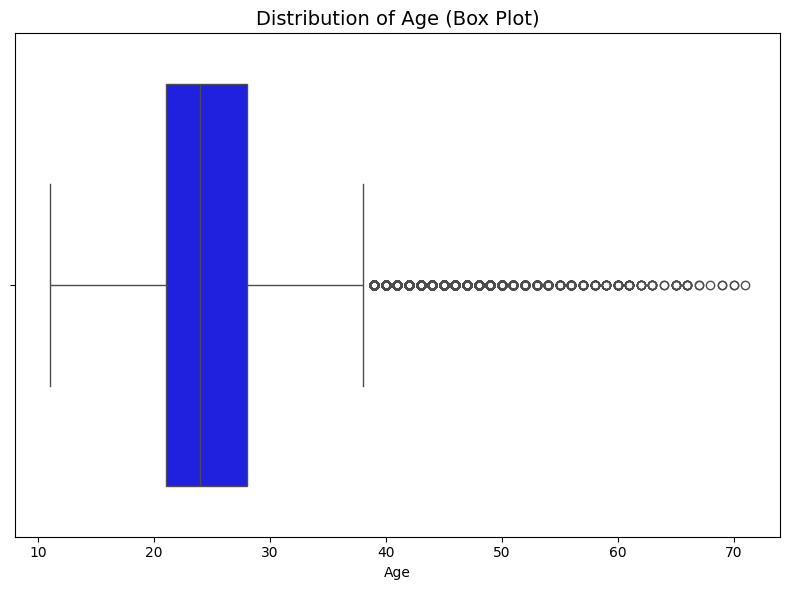

In [ ]:
# Age Box Plot
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Create the box plot for the 'Age' column
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Age', color='blue')

# Add a title to the chart
plt.title('Distribution of Age (Box Plot)', fontsize=14)

# Show the box plot
plt.tight_layout()

The median weight in pounds is: 154.3234


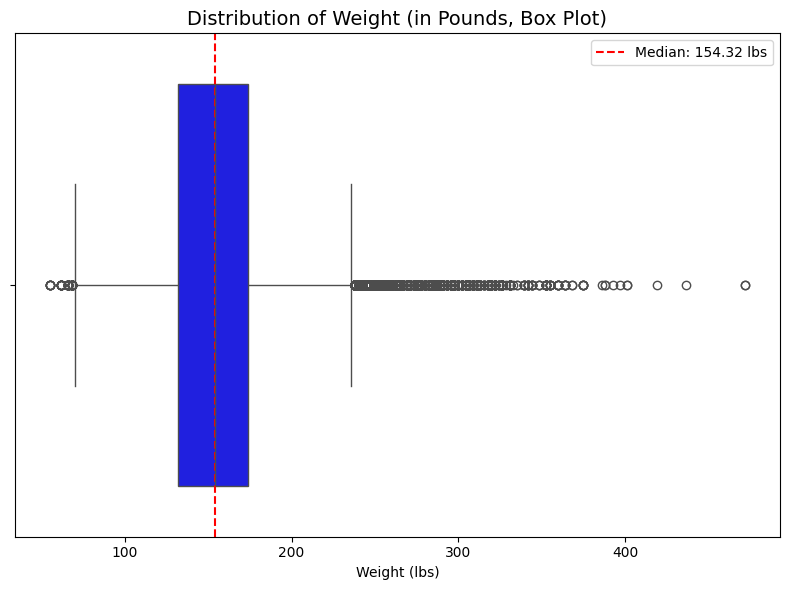

In [ ]:
# Weight box plot converted to Pounds
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')

# Convert weight from kilograms to pounds (1 kg = 2.20462 pounds)
df['Weight (lbs)'] = df['Weight'] * 2.20462

# Calculate the median of the 'Weight (lbs)' column
median_weight_lbs = df['Weight (lbs)'].median()
print(f"The median weight in pounds is: {median_weight_lbs}")

# Create the box plot for the 'Weight (lbs)' column
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x=df['Weight (lbs)'], color='blue')

# Add the median line to the plot
plt.axvline(median_weight_lbs, color='red', linestyle='--', label=f"Median: {round(median_weight_lbs, 2)} lbs")

# Add a title and legend to the chart
plt.title('Distribution of Weight (in Pounds, Box Plot)', fontsize=14)
plt.legend(loc='upper right', fontsize=10)

# Show the box plot
plt.tight_layout()
plt.show()
